

# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data is about the information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
I would be exploring if gender has any effect on whether patients showed up for appointments or not. 
i would also be exploring if receiving sms prior to the appointment or being handicapped affected showing up for appointments.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#loading the data
df = pd.read_csv('C:/Users/HP/Downloads/noshowappointments-kagglev2-may-2016.csv')



In [3]:
#showing some part of the data for inspection
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning 

In [4]:
#to check the information about the data, number of columns, number of rows and the data type
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It is shown that there are 14 columns and 110527 rows, and the data types are a combination of float, integer and object.
Also, the scheduledday and appointment day column are supposed to have datetime as thier data type.

In [5]:
#to check the description of the data: mean, median, maximum and minimum values
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The maximum age is 115 and the minimum age is -1 which is technically impossible

In [6]:
#to check for missing values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No missing values

In [7]:
#to check duplicated values
print(df.duplicated().sum())

0


No duplicated values

In [8]:
#to change the data type of these columns
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [9]:
#checking to confirm if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [10]:
#to check the row that has age as -1
df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
#it is just a row, so it is okay to drop the row since the correct age is not known

df.drop(df.index[df['Age'] == -1], inplace=True)

In [12]:
#to check if it worked
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Now, the minimum age is 0 and the maximum is 115

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

Now, we have 110526 rows and 14 columns

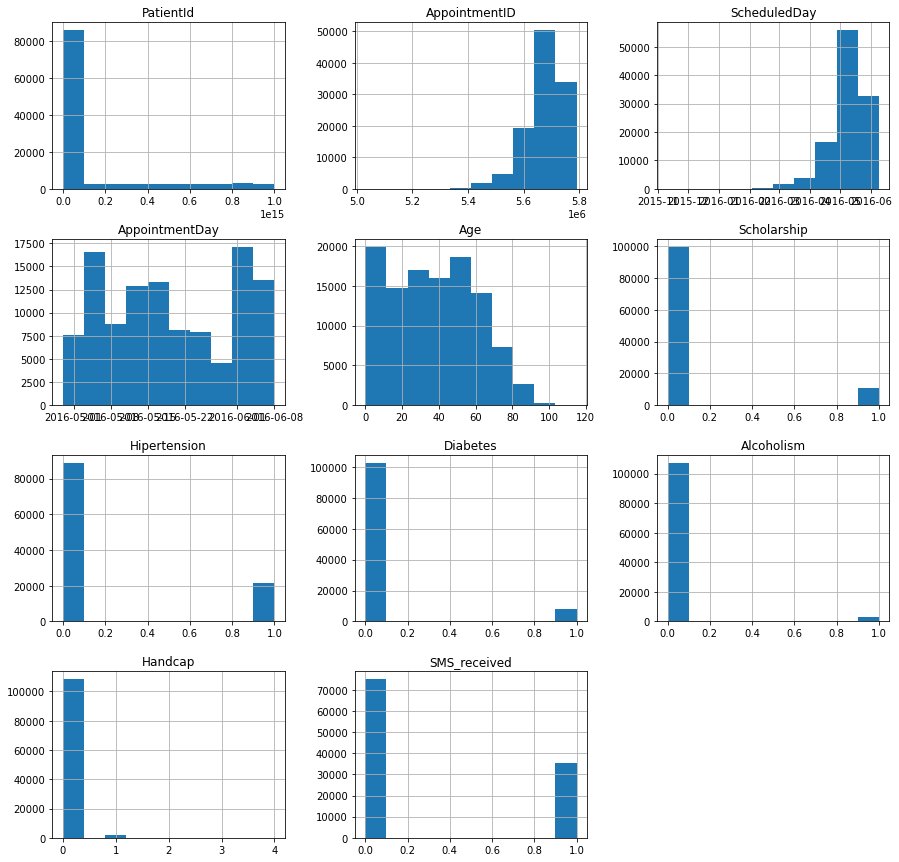

In [14]:
#to visualise the dataset
df.hist(figsize=(15, 15));

It can be seen that the age is skewed to the left, many peopel in this data set are younger.
The scholarship, hipertention, handcap, diabetes, alcoholism, sms_received are also skewed to the right, meaning there are more people with it than without it.


In [15]:
#to check the value count of the columns in question
print(df.SMS_received.value_counts())
print(df.Scholarship.value_counts())
print(df.Hipertension.value_counts())
print(df.Diabetes.value_counts())
print(df.Alcoholism.value_counts())
print(df.Handcap.value_counts())

0    75044
1    35482
Name: SMS_received, dtype: int64
0    99665
1    10861
Name: Scholarship, dtype: int64
0    88725
1    21801
Name: Hipertension, dtype: int64
0    102583
1      7943
Name: Diabetes, dtype: int64
0    107166
1      3360
Name: Alcoholism, dtype: int64
0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64


It is shown that the number of people with 0 are way more than people with 1 or more in all the columns

<a id='eda'></a>
## Exploratory Data Analysis


### To check the dependent (output variable)
##### No-show column- 'No' means the person showed up, while 'Yes' means the person did not show up for the appointment

In [16]:
#to check the count
df['No-show'].value_counts()


No     88207
Yes    22319
Name: No-show, dtype: int64

The number of people that showed up ('No') are more than people that did not show up ('Yes')

In [17]:
#to check the actual percentage
p = df['No-show']
counts = p.value_counts()
percent = p.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'percentage': percent})

,counts,percentage
No,88207,79.8%
Yes,22319,20.2%


79.8% showed up, 20.2% did not

Text(0, 0.5, 'Number')

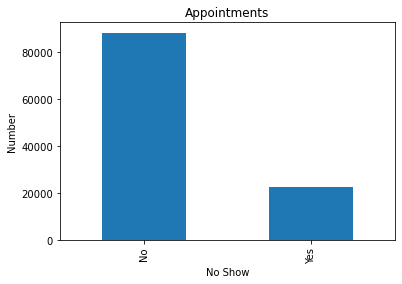

In [18]:
#to plot a bar chart to visualise the distribution
df['No-show'].value_counts().plot.bar()
plt.title('Appointments')
plt.xlabel('No Show')
plt.ylabel('Number')

### To check if gender had any effect on people showing up for appointment

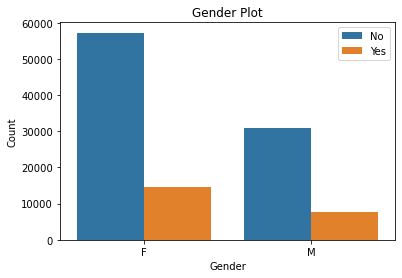

In [19]:
#plotting a bar chart
#defining a function

def count_plot(dframe, x_column, cat_column, title, x_label, y_label):
    sns.countplot(x = x_column, data = dframe, hue = cat_column)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend();
    
count_plot(df, 'Gender', 'No-show', 'Gender Plot', 'Gender', 'Count')

More females showed up for thier appointments compared to the males

In [20]:
#to check the gender distribution and see if that affected the visualisation
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

Females are more than males, so it is expected that they would show up more. Aditional research can be done to check why the distribution is skewed

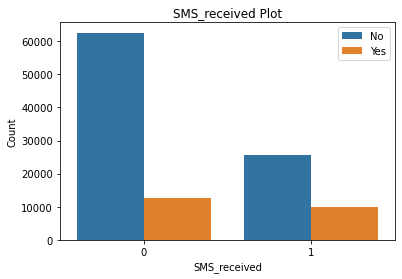

In [21]:
#to check if receiving sms had any effect on showing up for appointment
#calling the countplot function

count_plot(df, 'SMS_received', 'No-show', 'SMS_received Plot', 'SMS_received', 'Count')

Many people showed up without receiving sms, it can be further researched if sending sms is actually needed or the format should change

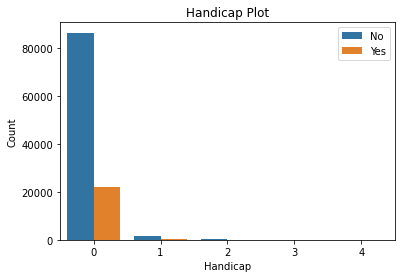

In [22]:
#to visualise the comparison between handcap and no-show columns
#calling the countplot function

count_plot(df, 'Handcap', 'No-show', 'Handicap Plot', 'Handicap', 'Count')

more people without disabilities (handicap) showed up compared to people with disabilities

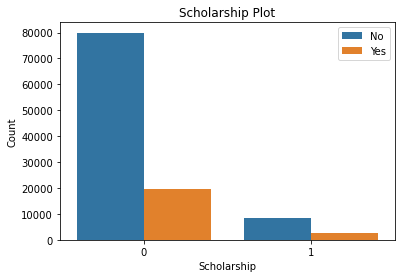

In [23]:
#to check if being on scholarship affected showing up
#calling the countplot function

count_plot(df, 'Scholarship', 'No-show', 'Scholarship Plot', 'Scholarship', 'Count')

Many people showed up without being on scholarship, but from the scholarship value count, a larger percentage are not on scholarship

## Conclusions


### Results

1. About 80% showed up for medical appointments in Brazil
2. There is a higher percentage (number) of people that were not on scholarship that showed up compared to people with scholarship
3. There is a higher percentage (number) of people that didnot received sms that showed up compared to people that actually recieved
4. A higher number of people without disabilities (handicap) showed up compared to people with disabilities Which can point to the fact that disability can pose a barrier to being mobile and showing up for appointment

### Limitations
We do not have a lot of details from the data, as to the process involved in the data collection. e.g people not on scholarship showed up more compare to people on, it seems to be counter-intuitive because being on scholarship should have made people show up more for their appointments. Also, people that received sms were not really showing up for thier appointments, we really do not know if the sms was sent to remind them of thier appointments or sms was sent as a follow up. 